# Chapter 6. 지도학습: 분류 - 배포용

지도학습 : 회귀, 분류
  - 회귀(regression) : target : continuous value  --> chapter 5
  - 분류(classification) : target : class(label, category)  --> this chapter

**실습문제**: 아래의 파이썬/넘파이 스크립트에서 None과 pass로 표시된 곳을 찾아서 적절한 코드로 대체하시오.

## 6.1 1차원 입력 2 클래스 분류

### 6.2.1 문제 설정

![대체 텍스트](식6-1.JPG)
- $x_n$ - 입력변수, 
- $t_n$ - 목표변수(target variable) : 클래스 0 또는 1
- $\textbf{x}$ - 입력 데이터, $\textbf{t}$ - 목표 데이터

예) 곤충 N 마리 데이터
- $x_n$ : 무게
- $t_n$ : 성별 (0 - 암컷, 1 - 수컷)
- 목적 :데이터에 기초한 무게를 통한 성별 예측

인공 데이터 생성:

In [1]:
# 리스트 6-1-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# 데이터 생성 --------------------------------
np.random.seed(seed=0) # 난수를 고정
X_min = 0
X_max = 2.5
X_n = 30
X_col = ['cornflowerblue', 'gray']
X = np.zeros(X_n) # 입력 데이터
T = np.zeros(X_n, dtype=np.uint8) # 목표 데이터
Dist_s = [0.4, 0.8] # 분포의 시작 지점
Dist_w = [0.8, 1.6] # 분포의 폭
Pi = 0.5 # 클래스 0의 비율
for n in range(X_n):
    wk = np.random.rand()
    T[n] = 0 * (wk < Pi) + 1 * (wk >= Pi) # (A)
    X[n] = np.random.rand() * Dist_w[T[n]] + Dist_s[T[n]] # (B)
# 데이터 표시 --------------------------------
print('X=' + str(np.round(X, 2)))
print('T=' + str(T))

X=[1.94 1.67 0.92 1.11 1.41 1.65 2.28 0.47 1.07 2.19 2.08 1.02 0.91 1.16
 1.46 1.02 0.85 0.89 1.79 1.89 0.75 0.9  1.87 0.5  0.69 1.5  0.96 0.53
 1.21 0.6 ]
T=[1 1 0 0 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0]


![대체 텍스트](그림6-1.JPG)

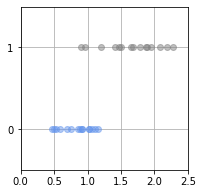

In [2]:
# 리스트 6-1-(2)
# 데이터 분포 표시 ----------------------------
def show_data1(x, t):
    K = np.max(t) + 1
    for k in range(K): # (A)
        plt.plot(x[t == k], t[t == k], X_col[k], alpha=0.5, linestyle='none', marker='o') # (B)
        # k는 0 또는 1
        # x[t == k] : 입력 데이터 중에 동일한 인덱스에서 t 값이 k인 것만 선택함 (불리언 인덱싱)
        # t[t == k] : 목표 데이터에서 값이 k인 것만 선택 (첫번째 루프에서는 0인 값만 선택, 
        #                                                 두번째 루프에서는 1인 값만 선택)
        plt.grid(True)
        plt.ylim(-.5, 1.5)
        plt.xlim(X_min, X_max)
        plt.yticks([0, 1])


# 메인 ------------------------------------
fig = plt.figure(figsize=(3, 3))
show_data1(X, T)
plt.show()

![대체 텍스트](p230.JPG)

![대체 텍스트](그림6-2.JPG)

단순히 선형 회귀 모델로 결정 경계를 정하는 것은 좋은 방법이 아니다.

![대체 텍스트](그림6-3.JPG)

### 6.1.2 확률로 나타내는 클래스 분류

![대체 텍스트](그림6-4.JPG)

![대체 텍스트](식6-2.JPG)

### 6.1.4 로지스틱 회귀 모델

![대체 텍스트](식6-9.JPG)

![대체 텍스트](그림6-6.JPG)

In [3]:
# 리스트 6-1-(3) : 로지스틱 회귀 모델
def logistic(x, w):
    y = 1/(1 + np.exp(-(w[0]*x+w[1])))    # 여기에 None 대신에 적절한 코드를 입력하시오.
    return y

1.25

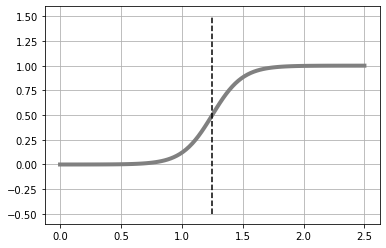

In [4]:
# 리스트 6-1-(4) : 로지스틱 회귀 모델을 결정 경계와 함께 표시
def show_logistic(w):
    xb = np.linspace(X_min, X_max, 100)
    y = logistic(xb, w)
    plt.plot(xb, y, color='gray', linewidth=4)
    # 결정 경계
    i = np.min(np.where(y > 0.5)) # (A)  np.where(y>0.5)는 y>0.5를 만족하는 요소번호를 모두 반환
    B = (xb[i - 1] + xb[i]) / 2 # (B)   B = y가 0.5를 넘은 직후의 xb[i]와, 그 직전의 xb[i-1]의 평균
    plt.plot([B, B], [-.5, 1.5], color='k', linestyle='--')
    plt.grid(True)
    
    return B

# test
W = [8, -10]
show_logistic(W)

### 6.1.5 교차 엔트로피 오차 (Cross Entropy Error, CEE)

![대체 텍스트](식6-11.JPG)
![대체 텍스트](식6-12.JPG)
![대체 텍스트](식6-16.JPG)

In [5]:
# 리스트 6-1-(5)
# 평균 교차 엔트로피 오차 ---------------------
def cee_logistic(w, x, t):
    y = 1/(1+np.exp(-(w[0]*x+w[1])))# 여기에 None 대신에 적절한 코드를 입력하시오.
    
    cee = 0
    for n in range(len(y)):  # 교차 엔트로피를 다 더한다. (-)를 붙이므로 뺀다고 봐도 무방
        cee = cee - (t[n] * np.log(y[n]) + (1 - t[n]) * np.log(1 - y[n]))
    cee = cee / len(x) # 갯수로 나누어 평균을 구함 
    return cee
    
    
# test
W=[1,1]
cee_logistic(W, X, T)

1.0288191541851066

평균 교차 엔트로피 함수의 모양:

![대체 텍스트](그림6-7.JPG)

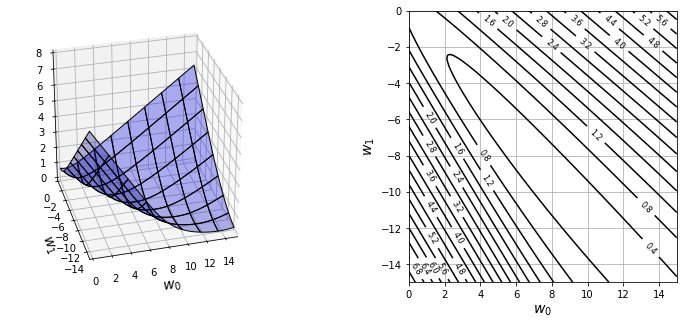

In [6]:
# 리스트 6-1-(6)
from mpl_toolkits.mplot3d import Axes3D

# 계산 --------------------------------------
wn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
w0 = np.linspace(w_range[0, 0], w_range[0, 1], wn)
w1 = np.linspace(w_range[1, 0], w_range[1, 1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = cee_logistic(w, X, T)

# 표시 --------------------------------------
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 8)
ax.view_init(30, -105)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black')
                   #, levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

위의 평균 교차 엔트로피 에러 그래프에서 최소치는 $w_0=9, w_1=-9$ 근처에 있음

#### CEE 대신에 MSE를 적용하면
<span style="color:red">
(Sung Kim 교수의 유튜브 동영상 '모두의 딥러닝 강좌: ML lec 5-2 Logistic Regression의 cost 함수 설명' 참조 ) 
</span> 

https://www.youtube.com/watch?v=6vzchGYEJBc&list=PLlMkM4tgfjnLSOjrEJN31gZATbcj_MpUm&index=12

In [7]:
# 리스트 6-1-(5)-1
# 로지스틱 함수에 만약 MSE 오차를 적용하면 ---------------------
def mse_logistic(w, x, t):
    y = None    # 여기에 None 대신에 적절한 코드를 입력하시오.
    return None    # 여기에 None 대신에 적절한 코드를 입력하시오.

# test
W=[1,1]
mse_logistic(W, X, T)

C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Z contains NaN values. This may result in rendering artifacts.
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\matplotlib\contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\matplotlib\contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\matplotlib\contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\matplotlib\contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\matplotlib\con

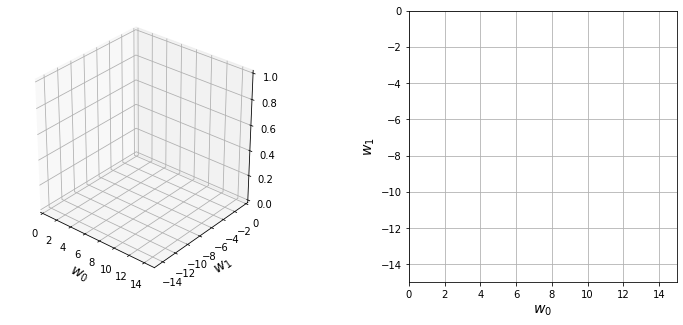

In [8]:
# 리스트 6-1-(6)-1
# mse_logistic에 대한 그래프
from mpl_toolkits.mplot3d import Axes3D

# 계산 --------------------------------------
wn = 80 # 등고선 표시 해상도
w_range = np.array([[0, 15], [-15, 0]])
w0 = np.linspace(w_range[0, 0], w_range[0, 1], wn)
w1 = np.linspace(w_range[1, 0], w_range[1, 1], wn)
ww0, ww1 = np.meshgrid(w0, w1)
C = np.zeros((len(w1), len(w0)))
w = np.zeros(2)
for i0 in range(wn):
    for i1 in range(wn):
        w[0] = w0[i0]
        w[1] = w1[i1]
        C[i1, i0] = mse_logistic(w, X, T)

# 표시 --------------------------------------
plt.figure(figsize=(12, 5))
#plt.figure(figsize=(9.5, 4))
plt.subplots_adjust(wspace=0.5)
ax = plt.subplot(1, 2, 1, projection='3d')
ax.plot_surface(ww0, ww1, C, color='blue', edgecolor='black',
                rstride=10, cstride=10, alpha=0.3)
ax.set_xlabel('$w_0$', fontsize=14)
ax.set_ylabel('$w_1$', fontsize=14)
ax.set_xlim(0, 15)
ax.set_ylim(-15, 0)
ax.set_zlim(0, 1)
ax.view_init(30, -50)

plt.subplot(1, 2, 2)
cont = plt.contour(ww0, ww1, C, 20, colors='black')
                   #, levels=[0.26, 0.4, 0.8, 1.6, 3.2, 6.4])
cont.clabel(fmt='%1.1f', fontsize=8)
plt.xlabel('$w_0$', fontsize=14)
plt.ylabel('$w_1$', fontsize=14)
plt.grid(True)
plt.show()

### 6.1.6 학습 규칙의 도출

![대체 텍스트](p243.JPG)
![대체 텍스트](p244.JPG)
![대체 텍스트](p245.JPG)
![대체 텍스트](p246.JPG)

로지스틱 회귀 모델의 학습 규칙 요약:
![대체 텍스트](그림6-8.JPG)

In [9]:
# 리스트 6-1-(7)
# 평균 교차 엔트로피 오차의 미분 --------------
def dcee_logistic(w, x, t):
    y = 1/(1+np.exp(-(w[0]*x+w[1])))    # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee = np.zeros(2)
    dcee[0] = np.sum((y-t)*x)
    # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee[1] = np.sum(y-t)   # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee = dcee/len(x)
    return dcee    

# --- test
W=[1, 1]
dcee_logistic(W, X, T)

array([0.30857905, 0.39485474])

### 6.1.7 경사 하강법에 의한 해

**경사하강법에 의한 매개변수의 최적화**: <span style="color:red">scipy.optimize 라이브러리에 포함된 minimize() 함수 이용</span> 

w0 = 8.18, w1 = -9.38
CEE = 0.25
Boundary = 1.15 g


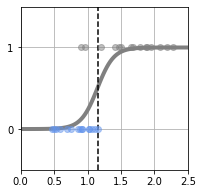

In [10]:
# 리스트 6-1-(8)
from scipy.optimize import minimize

# 최적 매개 변수 찾기 
def fit_logistic(w_init, x, t):
    res1 = minimize(cee_logistic, w_init, args=(x, t), #  scipy 라이브러리에 있는 함수로 경사하강법 수행,
                    jac=dcee_logistic, method="CG") # (A) CG = Conjugate Gradient Method
    # minimize()의 인수로는 교차 엔트로피 함수 cee_logistic, w의 초기값 w_init, 
    # args=(x,t)에는 cee_logistic의 w 이외의 인수를, jac=dcee_logistic에는 미분함수를 지정하고, 
    # method='CG'로 켤레 기울기법(Conjugate Gradient Method)이라는 경사하강법의 일종을 지정합니다.
    return res1.x

# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[1,-1]
W = fit_logistic(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

![대체 텍스트](그림6-9.JPG)

**실습문제:** scipy.optimize 라이브러리를 이용하지 말고 경사하강법을 직접 구현하여 최적의 매개변수를 구하는 fit_logistic() 함수를 구현하시오.

w_init =  [5, -5]
Iter = 10000 ,    CEE =  0.268
w_i[i, 0] = 5.391, w_i[i, 1] = -6.281
Iter = 20000 ,    CEE =  0.261
w_i[i, 0] = 5.933, w_i[i, 1] = -6.894
Iter = 30000 ,    CEE =  0.257
w_i[i, 0] = 6.331, w_i[i, 1] = -7.341
Iter = 40000 ,    CEE =  0.255
w_i[i, 0] = 6.637, w_i[i, 1] = -7.684
Iter = 50000 ,    CEE =  0.254
w_i[i, 0] = 6.881, w_i[i, 1] = -7.954
Iter = 60000 ,    CEE =  0.253
w_i[i, 0] = 7.077, w_i[i, 1] = -8.172
Iter = 70000 ,    CEE =  0.252
w_i[i, 0] = 7.239, w_i[i, 1] = -8.351
Iter = 80000 ,    CEE =  0.252
w_i[i, 0] = 7.374, w_i[i, 1] = -8.500
Iter = 90000 ,    CEE =  0.252
w_i[i, 0] = 7.486, w_i[i, 1] = -8.624
Iter = 100000 ,    CEE =  0.252
w_i[i, 0] = 7.582, w_i[i, 1] = -8.729
Iter = 110000 ,    CEE =  0.251
w_i[i, 0] = 7.662, w_i[i, 1] = -8.818
Iter = 120000 ,    CEE =  0.251
w_i[i, 0] = 7.731, w_i[i, 1] = -8.894
Iter = 130000 ,    CEE =  0.251
w_i[i, 0] = 7.790, w_i[i, 1] = -8.959
Iter = 140000 ,    CEE =  0.251
w_i[i, 0] = 7.841, w_i[i, 1] = -9.015
Iter = 1500

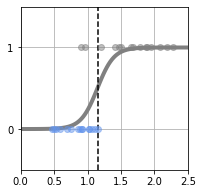

In [11]:
# 리스트 6-1-(8)-1
#from scipy.optimize import minimize

# 최적 매개 변수 찾기
def fit_logistic_num(w_init, x, t):
    '''''
    res1 = minimize(cee_logistic, w_init, args=(x, t), #  scipy 라이브러리에 있는 함수로 경사하강법 수행,
                    jac=dcee_logistic, method="CG") # (A) CG = Conjugate Gradient Method
    # minimize()의 인수로는 교차 엔트로피 함수 cee_logistic, w의 초기값 w_init, 
    # args=(x,t)에는 cee_logistic의 w 이외의 인수를, jac=dcee_logistic에는 미분함수를 지정하고, 
    # method='CG'로 켤레 기울기법(Conjugate Gradient Method)이라는 경사하강법의 일종을 지정합니다.
    return res1.x
    '''''
    alpha = 0.01 # 학습률
    i_max = 500000 # 반복의 최대 수
    eps = 0.0001 # 반복을 종료 기울기의 절대 값의 한계
    w_i = np.zeros([i_max, 2])    # iteration 별 w=[w0,w1] 값의 변경 내역
    w_i[0, :] = w_init
    print("w_init = ", w_init)
    for i in range(1, i_max):
        cee = cee_logistic(w_i[i-1],x,t)      # 여기에 None 대신에 적절한 코드를 입력하시오.
        dcee = dcee_logistic(w_i[i-1],x,t)   # 여기에 None 대신에 적절한 코드를 입력하시오.
        w_i[i, :] = [w_i[i-1,0]-alpha*dcee[0],w_i[i-1,1]-alpha*dcee[1]]        # 여기에 None 대신에 적절한 코드를 입력하시오.
        if i % 10000 == 0:
            print("Iter =", i, ",    CEE = ", np.round(cee,3))
            print("w_i[i, 0] = {0:.3f}, w_i[i, 1] = {1:.3f}".format(w_i[i, 0], w_i[i, 1]))
        if max(np.absolute(dcee)) < eps:     # 종료판정, np.absolute는 절대치
            break
    w = w_i[i, :]
    w_i = w_i[:i, :]            
    return w
                 
# 메인 ------------------------------------
plt.figure(1, figsize=(3, 3))
W_init=[5,-5]    # 초기 매개 변수
W = fit_logistic_num(W_init, X, T)
print("w0 = {0:.2f}, w1 = {1:.2f}".format(W[0], W[1]))
B=show_logistic(W)
show_data1(X, T)
plt.ylim(-.5, 1.5)
plt.xlim(X_min, X_max)
cee = cee_logistic(W, X, T)
print("CEE = {0:.2f}".format(cee))
print("Boundary = {0:.2f} g".format(B))
plt.show()

## 6.2 2차원 입력 2 클래스 분류

### 6.2.1 문제 설정

In [12]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


데이터 생성 (2클래스 분류와 3클래스 데이터를 함께 생성)

In [13]:
# 리스트 6-2-(1)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 데이터 생성 --------------------------------
np.random.seed(seed=1)  # 난수를 고정
N = 100 # 데이터의 수
K = 3 # 분포 수
T3 = np.zeros((N, 3), dtype=np.uint8)
T2 = np.zeros((N, 2), dtype=np.uint8)
X = np.zeros((N, 2))
X_range0 = [-3, 3] # X0 범위 표시 용
X_range1 = [-3, 3] # X1의 범위 표시 용
Mu = np.array([[-.5, -.5], [.5, 1.0], [1, -.5]]) # 분포의 중심
Sig = np.array([[.7, .7], [.8, .3], [.3, .8]]) # 분포의 분산
Pi = np.array([0.4, 0.8, 1]) # (A) 각 분포에 대한 비율 0.4 0.8 1
for n in range(N):
    wk = np.random.rand()
    for k in range(K): # (B)
        if wk < Pi[k]:
            T3[n, k] = 1
            break
    for k in range(2):
        X[n, k] = (np.random.randn() * Sig[T3[n, :] == 1, k]
                   + Mu[T3[n, :] == 1, k])
T2[:, 0] = T3[:, 0]                # 3개 클래스에 대한 레이블을 먼저 생성하고
T2[:, 1] = T3[:, 1] | T3[:, 2]     # 2개 클래스 테스트를 위해 클래스1과 클래스2를 하나로 합침

입력 데이터 **X**의 첫 5개:

In [14]:
# 리스트 6-2-(2)
print(X[:5,:])

[[-0.14173827  0.86533666]
 [-0.86972023 -1.25107804]
 [-2.15442802  0.29474174]
 [ 0.75523128  0.92518889]
 [-1.10193462  0.74082534]]


클래스 데이터 **T2**의 첫 5개:

In [15]:
# 리스트 6-2-(3)
print(T2[:5,:])

[[0 1]
 [1 0]
 [1 0]
 [0 1]
 [1 0]]


위에서 차례로 클래스 1, 0, 0, 1, 0에 속한다는 의미입니다.

클래스 데이터 **T3**의 첫 5개:

In [16]:
# 리스트 6-2-(4)
print(T3[:5,:])

[[0 1 0]
 [1 0 0]
 [1 0 0]
 [0 1 0]
 [1 0 0]]


이처럼 목적 변수 벡터 $t_n$의 $k$번째 요소만 1로, 그 외에는 0으로 표기하는 방법을 1-of-K 부호화 또는 one-hot encoding 이라고 합니다.

위에서 생성한 데이터에 대하여 **T2**와 **T3**를 그림으로 나타내면:
![대체 텍스트](그림6-10.JPG)

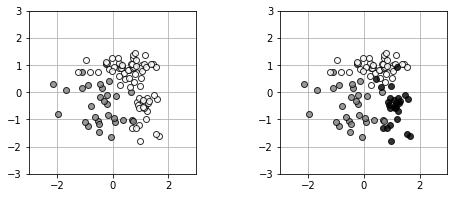

In [17]:
# 리스트 6-2-(5)
# 데이터 표시 --------------------------
def show_data2(x, t):
    wk, K = t.shape
    c = [[.5, .5, .5], [1, 1, 1], [0, 0, 0]]      # 회색, 흰색, 검정색
    for k in range(K):
        plt.plot(x[t[:, k] == 1, 0], x[t[:, k] == 1, 1],    
                 # x는 Nx2의 2차원 배열, x[:,0]는 첫번째 칼럼으로 x축 값, x[:,1]는 두번째 칼럼으로 y축 값
                 # 't[:, k] == 1'의 의미는 x의 각 행 중에 k번째 클래스가 1인 것만 선택
                 linestyle='none', markeredgecolor='black',
                 marker='o', color=c[k], alpha=0.8)
        plt.grid(True)

# 메인 ------------------------------
plt.figure(figsize=(7.5, 3))
plt.subplots_adjust(wspace=0.5)
plt.subplot(1, 2, 1)
show_data2(X, T2)
plt.xlim(X_range0)
plt.ylim(X_range1)

plt.subplot(1, 2, 2)
show_data2(X, T3)
plt.xlim(X_range0)
plt.ylim(X_range1)
plt.show()

### 6.2.2 로지스틱 회귀 모델

로지스틱 회귀모델은 1차원 입력 모델(식6-11)에서 간단히 2차원 입력 모델(식6-35)로 확장할 수 있습니다(그림6-11).

![대체 텍스트](p254.JPG)

In [20]:
# 리스트 6-2-(6)
# 로지스틱 회귀 모델 -----------------
def logistic2(x0, x1, w):
    line = x0*w[0]+x1*w[1]+w[2]
    y = 1/(1+np.exp(line))    # 여기에 None 대신에 적절한 코드를 입력하시오.
    return y

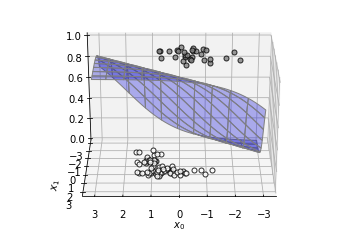

In [21]:
# 리스트 6-2-(7) : W=[-1,-1,-1]인 경우에 2차원 로지스틱 회귀 모델과 데이터를 3차원으로 표시 
# 모델 3D보기 
from mpl_toolkits.mplot3d import axes3d

def show3d_logistic2(ax, w):
    xn = 50
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    ax.plot_surface(xx0, xx1, y, color='blue', edgecolor='gray',
                    rstride=5, cstride=5, alpha=0.3)

def show_data2_3d(ax, x, t):
    #c = [[.5, .5, .5], [1, 1, 1]]    
    c = ['gray', 'white']
    for i in range(2):
        ax.plot(x[t[:, i] == 1, 0], x[t[:, i] == 1, 1], 1 - i,
                marker='o', color=c[i], markeredgecolor='black',
                linestyle='none', markersize=5, alpha=0.8)
    ax.set_xlabel('$x_0$')
    ax.set_ylabel('$x_1$')
    #ax.view_init(elev=25, azim=-30)
    ax.view_init(elev=25, azim=90)

# test ---
Ax = plt.subplot(1, 1, 1, projection='3d')
W=[-1, -1, -1]
show3d_logistic2(Ax, W)
show_data2_3d(Ax,X,T2)

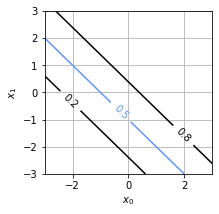

In [22]:
# 리스트 6-2-(8)
# 모델 등고선 2D 표시 ------------------------
def show_contour_logistic2(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)
    xx0, xx1 = np.meshgrid(x0, x1)
    y = logistic2(xx0, xx1, w)
    cont = plt.contour(xx0, xx1, y, levels=(0.2, 0.5, 0.8),
                       colors=['k', 'cornflowerblue', 'k'])
    cont.clabel(fmt='%1.1f', fontsize=10)
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.grid(True)

# test ---
plt.figure(figsize=(3,3))
W=[-1, -1, -1]
show_contour_logistic2(W)

모델의 평균 교차 엔트로피 오차는 앞에 나왔던 (식6-17)을 그대로 사용합니다.

![대체 텍스트](식6-17.JPG)

데이터에서는 1-of-K 부호화를 사용하는데, 2클래스 분류 문제이므로 $\textbf{T}$의 0열째 $t_{n0}$을 $t_n$으로 두고, 1이면 클래스0, 0이면 클래스1로, 앞 절과 마찬가지로 문제를 처리할 수 있습니다.

In [42]:
# 리스트 6-2-(9)
# 크로스 엔트로피 오차 ------------
def cee_logistic2(w, x, t):
    X_n = x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    cee = np.mean(t[:,0]*np.log(y)+(1-t[:,0])*np.log(1-y),axis=0)
    # 여기에 None 대신에 적절한 코드를 입력하시오.
    return cee

매개변수의 편미분을 구하면, (식6-37), (식6-38), (식6-39)를 얻을 수 있습니다.

![대체 텍스트](식6-37.JPG)

In [43]:
# 리스트 6-2-(10) : : W=[-1,-1,-1]인 경우의 편미분 계산
# 크로스 엔트로피 오차의 미분 ------------
def dcee_logistic2(w, x, t):
    X_n=x.shape[0]
    y = logistic2(x[:, 0], x[:, 1], w)
    dcee = np.zeros(3)
    dcee[0] = 1/X_n*np.sum((y-t[:,0])*x[:,0],axis=0)      # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee[1] = 1/X_n*np.sum((y-t[:,0])*x[:,1],axis=0)      # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee[2] = np.mean(y-t[:,0], axis=0)      # 여기에 None 대신에 적절한 코드를 입력하시오.
    return dcee

# test ---
W=[-1, -1, -1]
dcee_logistic2(W, X, T2)

array([0.51844071, 0.36287848, 0.46307245])

**경사하강법에 의한 매개변수의 최적화**: <span style="color:red">scipy.optimize 라이브러리에 포함된 minimize() 함수 이용</span> 

C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """
C:\Users\jhbea\AppData\Local\conda\conda\envs\cuda\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: overfl

w0 = -371228.35, w1 = -224226.30, w2 = -356168.06
CEE = nan


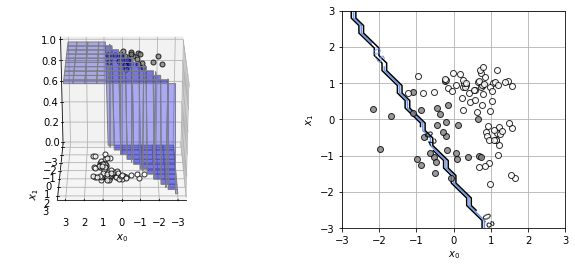

In [44]:
# 리스트 6-2-(11)
from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 찾기
def fit_logistic2(w_init, x, t):
    res = minimize(cee_logistic2, w_init, args=(x, t),
                   jac=dcee_logistic2, method="CG")
    return res.x

# 메인 ------------------------------------
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

![대체 텍스트](그림6-12.JPG)

**실습문제:** scipy.optimize 라이브러리를 이용하지 말고 경사하강법을 직접 구현하여 최적의 매개변수를 구하는 fit_logistic2() 함수를 구현하시오.

In [ ]:
# 리스트 6-2-(11)-1
#from scipy.optimize import minimize

# 로지스틱 회귀 모델의 매개 변수 찾기
def fit_logistic2_num(w_init, x, t):
    pass         # 여기에 pass 대신에 적절한 코드를 입력하시오.
    return w
    
# 메인 ------------------------------------
plt.figure(1, figsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

Ax = plt.subplot(1, 2, 1, projection='3d')
W_init = [-1, 0, 0]
W = fit_logistic2_num(W_init, X, T2)
print("w0 = {0:.2f}, w1 = {1:.2f}, w2 = {2:.2f}".format(W[0], W[1], W[2]))
show3d_logistic2(Ax, W)

show_data2_3d(Ax, X, T2)
cee = cee_logistic2(W, X, T2)
print("CEE = {0:.2f}".format(cee))

Ax = plt.subplot(1, 2, 2)
show_data2(X, T2)
show_contour_logistic2(W)
plt.show()

## 6.3 2차원 입력 3클래스 분류 

### 6.3.1 3클래스 분류 로지스틱 회귀 모델

![대체 텍스트](그림6-13.JPG)

![대체 텍스트](p260.JPG)
![대체 텍스트](p261.JPG)

In [ ]:
# 리스트 6-2-(12)
# 3 클래스 용 로지스틱 회귀 모델 -----------------
def logistic3(x0, x1, w):
    K = 3
    w = w.reshape((3, 3))
    n = len(x1)
    a = np.zeros((n, K))
    y = np.zeros((n, K))
    for k in range(K):
        a[:, k] = None     # 여기에 None 대신에 적절한 코드를 입력하시오.
    u = None     # u.shape = (n,1) # 여기에 None 대신에 적절한 코드를 입력하시오.
    y = None     # y.shape = (n,k) / (n,1) = (n,k) # 여기에 None 대신에 적절한 코드를 입력하시오.
    return y

# test ---
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
y = logistic3(X[:5, 0], X[:5, 1], W)    # 5개의 입력 데이터에 대해서만 테스트 함
print(np.round(y, 3))

### 6.3.2 교차 엔트로피 오차

![대체 텍스트](p262.JPG)
![대체 텍스트](p263.JPG)

In [ ]:
# 리스트 6-2-(13)
# 교차 엔트로피 오차 ------------
def cee_logistic3(w, x, t):
    #X_n = x.shape[0]
    y = None      # 여기에 None 대신에 적절한 코드를 입력하시오.
    cee = None    # 여기에 None 대신에 적절한 코드를 입력하시오.
    return cee

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
cee_logistic3(W, X, T3)

### 6.3.3 경사하강법에 의한 해

**경사하강법을 위한 편미분**: 

![대체 텍스트](식6-51.JPG)

In [ ]:
# 리스트 6-2-(14)
# 교차 엔트로피 오차의 미분 ------------
def dcee_logistic3(w, x, t):
    X_n = x.shape[0]
    y = None      # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee = np.zeros((3, 3)) # (클래스의 수 K) x (x의 차원 D+1)
    N, K = y.shape
    for n in range(N):
        for k in range(K):
            dcee[k, :] = None    # 여기에 None 대신에 적절한 코드를 입력하시오.
    dcee = dcee / X_n
    return dcee.reshape(-1)  # dcee.shape = (9,), minimize() 함수의 인자로 전달하기 위하여 1차원 배열로 변환

# test ----
W = np.array([1, 2, 3, 4 ,5, 6, 7, 8, 9])
dcee_logistic3(W, X, T3)

**경사하강법에 의한 매개변수의 최적화**: <span style="color:red">scipy.optimize 라이브러리에 포함된 minimize() 함수 이용</span> 

In [ ]:
# 리스트 6-2-(15)
# 최적 매개 변수 찾기 -----------------
def fit_logistic3(w_init, x, t):
    res = minimize(cee_logistic3, w_init, args=(x, t),
                   jac=dcee_logistic3, method="CG")
    return res.x

In [ ]:
# 리스트 6-2-(16)
# 모델 등고선 2D 표시 --------------------
def show_contour_logistic3(w):
    xn = 30 # 파라미터의 분할 수
    x0 = np.linspace(X_range0[0], X_range0[1], xn)
    x1 = np.linspace(X_range1[0], X_range1[1], xn)

    xx0, xx1 = np.meshgrid(x0, x1)
    y = np.zeros((xn, xn, 3))
    for i in range(xn):
        ynk = logistic3(xx0[:, i], xx1[:, i], w)  # ynk.shape = (n,k) where n=xn, k=3
        for j in range(3):
            y[:, i, j] = ynk[:, j]
    for j in range(3):
        cont = plt.contour(xx0, xx1, y[:, :, j],
                           levels=(0.5, 0.9),
                           colors=['cornflowerblue', 'k'])
        cont.clabel(fmt='%1.1f', fontsize=9)
    plt.grid(True)

In [ ]:
# 리스트 6-2-(17)
# 메인 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(4, 4))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()

**실습문제:** scipy.optimize 라이브러리를 이용하지 말고 경사하강법을 직접 구현하여 최적의 매개변수를 구하는 fit_logistic3() 함수를 구현하시오.

In [ ]:
# 리스트 6-2-(15)-1
# 최적 매개 변수 찾기 -----------------
def fit_logistic3_num(w_init, x, t):
    pass         # 여기에 pass 대신에 적절한 코드를 입력하시오.
    return w

In [ ]:
# 리스트 6-2-(17)-1
# 메인 ------------------------------------
W_init = np.zeros((3, 3))
W = fit_logistic3_num(W_init, X, T3)
print(np.round(W.reshape((3, 3)),2))
cee = cee_logistic3(W, X, T3)
print("CEE = {0:.2f}".format(cee))

plt.figure(figsize=(4, 4))
show_data2(X, T3)
show_contour_logistic3(W)
plt.show()